# 4.3-4.4 数值微分、梯度

## 4.3.1-4.3.2 导数

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [24]:
# # 不好的的实现示例
# def numerical_diff(f, x):
#     h = 10e-50
#     return (f(x+h) - f(x)) / h

# # 舍入误差
# np.float32(1e-50)

# 导数的实现
def numerical_diff(f, x):
    h = 1e-4 # 0.001
    return (f(x+h) - f(x-h)) / (2*h)

In [25]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

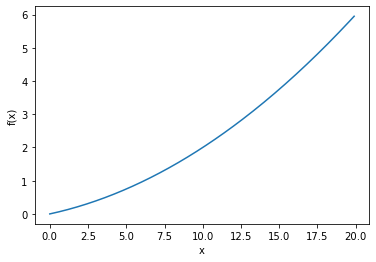

In [26]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [27]:
# 切线
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

0.1999999999990898


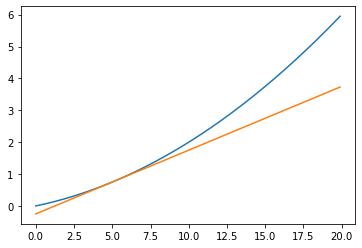

In [28]:
tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

## 4.3.3 偏导数

In [29]:
# 二元函数
def function_2(x):
    # return x[0]**2 + x[1]**2
    return np.sum(x**2)

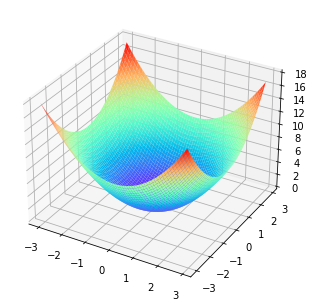

In [30]:
fig = plt.figure()
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
x = np.arange(-3,3,0.1)
y = np.arange(-3,3,0.1)
x,y = np.meshgrid(x,y)
z = x**2 + y**2
ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='rainbow')
plt.show()

In [31]:
# 偏导数x
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [32]:
# 偏导数y
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 4.4 梯度

In [33]:
# 计算梯度
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]

        # 计算f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # 计算f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        # 还原x
        x[idx] = tmp_val
    return grad

In [34]:
a = numerical_gradient(function_2, np.array([3.0, 4.0]))
b = numerical_gradient(function_2, np.array([0.0, 2.0]))
c = numerical_gradient(function_2, np.array([3.0, 0.0]))
print(a)
print(b)
print(c)

[6. 8.]
[0. 4.]
[6. 0.]


No handles with labels found to put in legend.


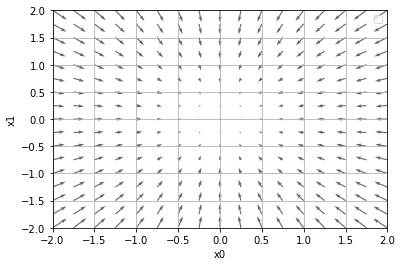

In [35]:
# gradient_2d.py
# 梯度图像
# 梯度方向是一点处函数值下降最多的方向

# 单个数据梯度
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        
    return grad

# 批数据梯度
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
    return grad

# 函数（单个数据/批数据）
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

# 切线
def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

# 画梯度图像
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

## 4.4.1 梯度法

In [36]:
# 梯度下降法
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

梯度下降法例

In [37]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

实例的图像

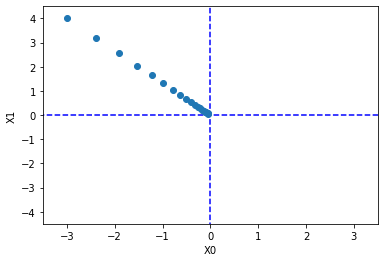

In [38]:
# gradient_method.py
def gradient_descent_1(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent_1(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


学习率的影响

In [39]:
# 学习率过大，发散
lr = 10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [40]:
# 学习率过小，几乎不更新
lr = 1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

## 4.4.2 神经网络的梯度

In [41]:
# gradient_simplenet.py
# 构建simplenet类
# 一层网络，2输入，3输出
import sys, os
sys.path.append(os.pardir)
# 从common文件夹下导入相关函数
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        # 随机生成权重矩阵
        self.W = np.random.randn(2, 3)
    
    # 信号传递
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [42]:
# 实例实验
net = simpleNet()
print(net.W)
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
# 获取最大值的索引
np.argmax(p)
t = np.array([0, 0, 1])
net.loss(x, t)

[[ 1.86172619  1.67648499 -0.12916123]
 [-0.58099836  0.65852007  1.2018818 ]]
[0.59413719 1.59855906 1.00419688]


1.2457338515638943

In [43]:
# 实例实验续1
# 求梯度
# 通过调用net，修改simpleNet中参数W,进而更新损失函数，具体细节参见函数numerical_gradient

# W 是伪参数，为了使用numerical_gradient而定义
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.11456421  0.3127979  -0.4273621 ]
 [ 0.17184631  0.46919685 -0.64104316]]


In [44]:
# 实例实验续2
# 利用匿名函数
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.11456421  0.3127979  -0.4273621 ]
 [ 0.17184631  0.46919685 -0.64104316]]
